In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('clean_dataset.csv')
df = df.dropna()
df = df[df['RiskCategory'] != 'High Risk']
features = [
    'TotalMinutesAsleep', 
    'TotalSteps', 
    'Calories', 
    'SedentaryMinutes_x', 
    'VeryActiveMinutes_x', 
    'AverageHeartRate'
]

X = df[features]
y = df['RiskCategory']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [8]:
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9091

Classification Report:

              precision    recall  f1-score   support

    Low Risk       0.91      1.00      0.95        50
 Medium Risk       0.00      0.00      0.00         5

    accuracy                           0.91        55
   macro avg       0.45      0.50      0.48        55
weighted avg       0.83      0.91      0.87        55



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

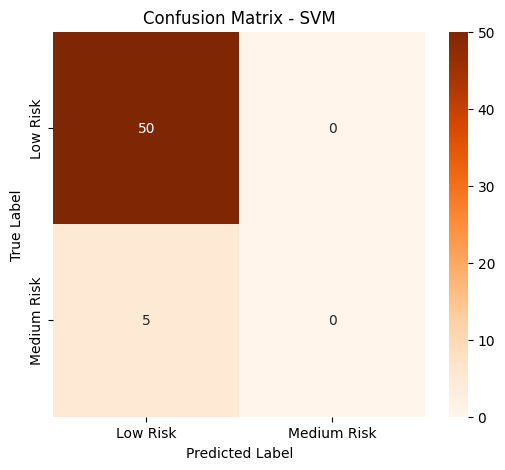

In [9]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm, labels=['Low Risk', 'Medium Risk'])
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Oranges", 
            xticklabels=['Low Risk', 'Medium Risk'], 
            yticklabels=['Low Risk', 'Medium Risk'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()